In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [95]:
df = pd.read_csv("Real estate.csv")
df.drop("No", axis = 1, inplace = True)

In [96]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [97]:
df.drop(["X1 transaction date", "X5 latitude", "X6 longitude"], axis = 1, inplace = True)

In [98]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 13.1 KB


In [100]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


In [101]:
df["X4 number of convenience stores"] = df["X4 number of convenience stores"].astype("float64")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    float64
 3   Y house price of unit area              414 non-null    float64
dtypes: float64(4)
memory usage: 13.1 KB


In [103]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1


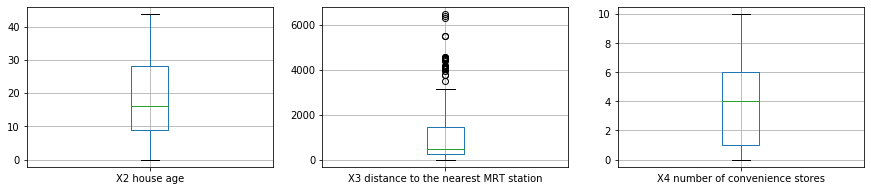

In [104]:
plt.figure(figsize = (15, 10))

for i in range(1, 4):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = df.columns[i-1])
    # fig.set_title("Pregnancies")


In [105]:
iqr = df["X3 distance to the nearest MRT station"].quantile(0.75) -  df["X3 distance to the nearest MRT station"].quantile(0.25)
min_val =  df["X3 distance to the nearest MRT station"].quantile(0.25) - (iqr * 1.5)
max_val =  df["X3 distance to the nearest MRT station"].quantile(0.75) + (iqr * 1.5)
df["X3 distance to the nearest MRT station"] = np.where( df["X3 distance to the nearest MRT station"] > max_val, max_val,  df["X3 distance to the nearest MRT station"])
df["X3 distance to the nearest MRT station"] = np.where( df["X3 distance to the nearest MRT station"] < min_val, min_val,  df["X3 distance to the nearest MRT station"])

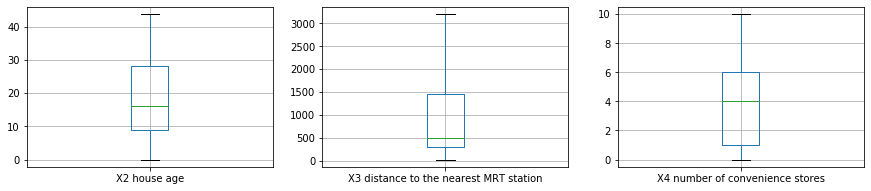

In [106]:
plt.figure(figsize = (15, 10))

for i in range(1, 4):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = df.columns[i-1])
    # fig.set_title("Pregnancies")


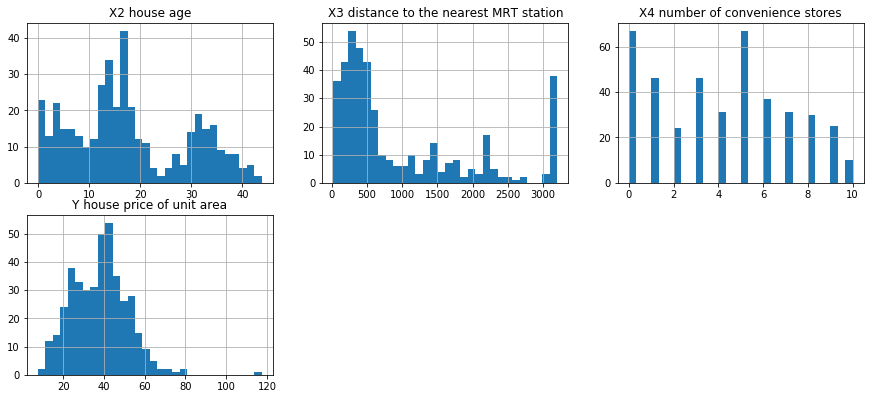

In [107]:
plt.figure(figsize = (15, 10))

for i in range(1, len(df.columns)+1):
    plt.subplot(3,3,i)
    fig = df[df.columns[i-1]].hist(bins = 30)
    fig.set_title(df.columns[i-1])


In [108]:
x = df.drop("Y house price of unit area", axis = 1)
y = df["Y house price of unit area"]

In [109]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


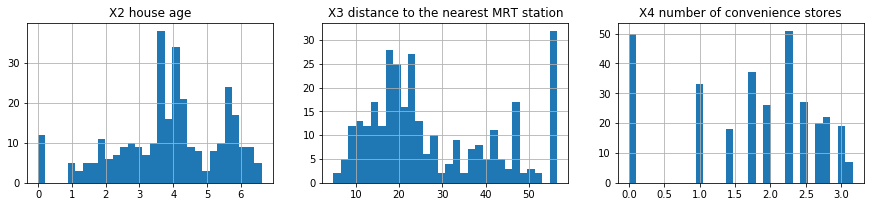

In [110]:
skew = ["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores"]
plt.figure(figsize = (15, 10))

for i in range(1, len(skew)+1):
    plt.subplot(3,3,i)
    xtrain[skew[i-1]] = np.sqrt(xtrain[skew[i-1]])
    xtest[skew[i-1]] = np.sqrt(xtest[skew[i-1]])
    fig = xtrain[skew[i-1]].hist(bins = 30)
    fig.set_title(df.columns[i-1])


In [111]:
# from sklearn.preprocessing import StandardScaler
# encoder = StandardScaler()
# xtrain = encoder.fit_transform(xtrain)
# xtest = encoder.fit_transform(xtest)

from sklearn.preprocessing import PolynomialFeatures

polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
xtrain = polynomial_converter.fit_transform(xtrain)
xtest = polynomial_converter.fit_transform(xtest)

In [112]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
# model = RandomForestRegressor(random_state=1234)

In [114]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_pred = model.predict(xtest)

In [116]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)

In [117]:
mse ** 0.5

7.7137665348564575